In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

import nbimporter
import sys
sys.path.append('../')

from src.ees_external_condition import ExternalCondition

# Purpose

Discrete Fourier Transformation (DFT)

# Theory

## Outline

## Reference

http://mathtrain.jp/fourierseries

http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/toc.html

http://www.mk-mode.com/octopress/2013/06/10/cpp-discrete-fourier-transform/

http://www.geocities.jp/supermisosan/fourier.html


1周期を$N$分割したサンプル点（複素数列）$x(0),x(1), \cdots ,x(N-1)$に対して得られる$N$個のサンプル値（複素数列）を、$X(0),X(1), \cdots ,X(N-1)$とすると、

$$
\displaystyle
\begin{array}{ll}
X(k)=\Sigma_{n=0}^{N-1}x(n)\exp(-i \frac{2\pi}{N}kn) & (k=0,1,2, \cdots ,N-1)
\end{array}
$$

$$
\displaystyle
\begin{array}{ll}
x(n) = \frac{1}{N} \Sigma_{k=0}^{N-1} X(k) \exp (i \frac{ 2 \pi }{ N } kn ) & (n=0,1,2,\cdot,N-1)
\end{array}
$$

が得られる。1つ目の式はフーリエ変換、2つ目の式は逆フーリエ変換と呼ばれる。オイラーの公式を適用すると、

$$
\displaystyle
\begin{array}{ll}
X(k)=\Sigma_{n=0}^{N-1} x(n) \left( \cos \frac {2 \pi}{N} kn - i \sin \frac{2 \pi}{N} kn \right) & (k=0,1,2, \cdots ,N-1)
\end{array}
$$

$$
\displaystyle
\begin{array}{ll}
x(n) = \frac{1}{N} \Sigma_{k=0}^{N-1} X(k) \left( \cos \frac {2 \pi}{N} kn + i \sin \frac{2 \pi}{N} kn \right) & (n=0,1,2,\cdot,N-1)
\end{array}
$$

となる。さらに、$x(n)$,$X(n)$は複素数なので、実部・虚部を分けてそれぞれ、$x_r(n)$, $x_i(n)$, $X_r(k)$, $X_i(k)$とすると、

$$
\displaystyle
\begin{array}{ll}
X(k) = \Sigma_{n=0}^{N-1} \left( x_r(n) \cos \frac {2 \pi}{N} kn + x_i(n) \sin \frac{2 \pi}{N} kn \right) + i \Sigma_{n=0}^{N-1} \left( - x_r(n) \sin \frac {2 \pi}{N} kn + x_i(n) \cos \frac{2 \pi}{N} kn \right) & (k=0,1,2, \cdots ,N-1)
\end{array}
$$

$$
\displaystyle
\begin{array}{ll}
x(n) = \frac{1}{N} \Sigma_{k=0}^{N-1} \left( X_r(k) \cos \frac {2 \pi}{N} kn - X_i(k) \sin \frac{2 \pi}{N} kn \right) + \frac{i}{N} \Sigma_{k=0}^{N-1} \left( X_r(k) \sin \frac {2 \pi}{N} kn + X_i(k) \cos \frac{2 \pi}{N} kn \right) & (n=0,1,2,\cdot,N-1)
\end{array}
$$

となる。

## Function

In [2]:
def transform(d):
    
    # d: list of data

    def get_dft_re(k):
        return sum([ src_re[n] * math.cos(2 * math.pi / num * k * n) + src_im[n] * math.sin(2 * math.pi / num * k * n) for n in range(num)])

    def get_dft_im(k):
        return sum([-src_re[n] * math.sin(2 * math.pi / num * k * n) + src_im[n] * math.cos(2 * math.pi / num * k * n) for n in range(num)])
    
    def get_idft_re(n):
        return sum([dft_re[k] * math.cos(2 * math.pi / num * k * n) - dft_im[k] * math.sin(2 * math.pi / num * k * n) for k in range(num)]) / num
    
    def get_idft_im(n):
        return sum([dft_re[k] * math.sin(2 * math.pi / num * k * n) + dft_im[k] * math.cos(2 * math.pi / num * k * n) for k in range(num)]) / num
    
    num = len(d)
    
    src_re = np.array(d)
    src_im = np.zeros_like(src_re)

    dft_re = [get_dft_re(k) for k in range(num)]
    dft_im = [get_dft_im(k) for k in range(num)]

    idft_re = [get_idft_re(n) for n in range(num)]
    idft_im = [get_idft_im(n) for n in range(num)]

    return dft_re, dft_im, idft_re, idft_im

## Example

In [3]:
transform([1,2,3,4,5,6,7,8,9,10])

([55.0,
  -5.0,
  -5.000000000000003,
  -5.000000000000003,
  -5.000000000000002,
  -5.0,
  -4.999999999999998,
  -4.999999999999959,
  -4.999999999999985,
  -4.999999999999956],
 [0.0,
  15.388417685876268,
  6.881909602355867,
  3.632712640026803,
  1.6245984811645275,
  -6.123233995736766e-15,
  -1.6245984811645382,
  -3.632712640026824,
  -6.881909602355874,
  -15.388417685876306],
 [1.0000000000000102,
  1.9999999999999978,
  2.9999999999999947,
  3.9999999999999973,
  4.9999999999999964,
  5.999999999999995,
  7.000000000000003,
  8.000000000000004,
  9.0,
  10.000000000000009],
 [-8.348877145181177e-15,
  -9.414691248821327e-15,
  -1.5099033134902129e-15,
  0.0,
  -2.3092638912203257e-15,
  4.440892098500626e-15,
  6.394884621840902e-15,
  -6.7501559897209515e-15,
  -8.881784197001252e-16,
  2.842170943040401e-15])

# Use numpy Library

## Example

Discrete fourier transformation

In [4]:
dft = np.fft.fft([1,2,3,4,5,6,7,8,9,10])

In [5]:
dft

array([55. +0.j        , -5.+15.38841769j, -5. +6.8819096j ,
       -5. +3.63271264j, -5. +1.62459848j, -5. +0.j        ,
       -5. -1.62459848j, -5. -3.63271264j, -5. -6.8819096j ,
       -5.-15.38841769j])

Inverse discrete fourier transformation

In [6]:
idft = np.fft.ifft(dft)

In [7]:
idft

array([ 1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j,  5.+0.j,  6.+0.j,  7.+0.j,
        8.+0.j,  9.+0.j, 10.+0.j])

# Example of Analysis of Outdoor Temperature

## Functions

Read CSV data and get outdoor temperature data.

In [8]:
def get_outdoor_temperature(region):
    PATH = '../data/ees_external_condition.csv'
    ec = ExternalCondition(PATH, region, False, False)
    return [r.T.C for r in ec.get_air_row()]

Apply fourier transform and make sin curves.

In [9]:
def make_curve(data, k):
    
    def get_value(dft, n):
        return np.array([(dft[n].real * np.cos(2 * np.pi / 8760 * i * n) \
                          - dft[n].imag * np.sin(2 * np.pi / 8760 * i * n) ) / 8760 for i in range(8760)])

    def get_curve(dft, k):
        v = get_value(dft, 0)
        if k > 0:
            for j in range(1, k+1):
                v = v + get_value(dft, j) * 2
        return v
    
    dft = np.fft.fft(data)
    
    return get_curve(dft, k)

Draw figure

In [10]:
def draw_figure(temp, curves):
    fig = plt.figure(figsize = (15,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(range(8760), temp)
    for c in curves:
        ax.plot(range(8760), c)
    ax.set_xlabel('day', fontsize = 15)
    ax.set_ylabel('temprature, degree C', fontsize = 15)

### Region 1

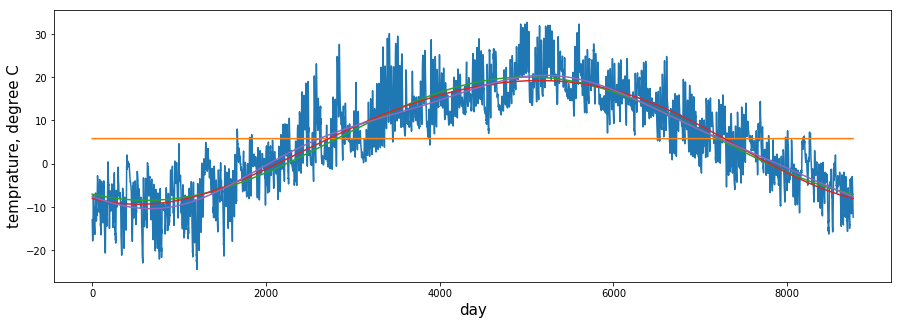

In [11]:
temp = get_outdoor_temperature('region1')
curves = [make_curve(temp,0), make_curve(temp,1), make_curve(temp,2), make_curve(temp,3)]
draw_figure(temp, curves)

### Region 2

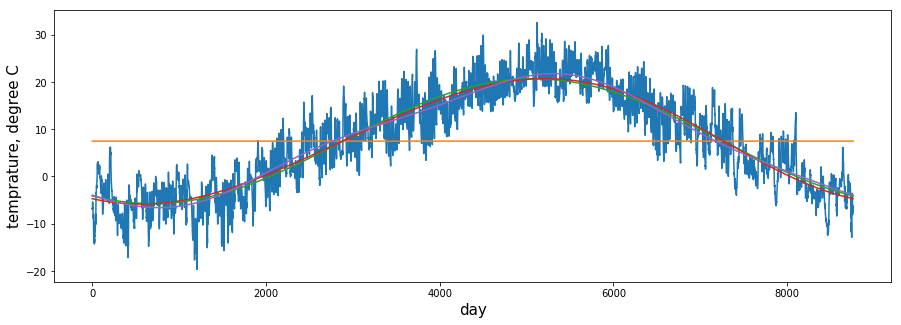

In [12]:
temp = get_outdoor_temperature('region2')
curves = [make_curve(temp,0), make_curve(temp,1), make_curve(temp,2), make_curve(temp,3)]
draw_figure(temp, curves)

### Region 3

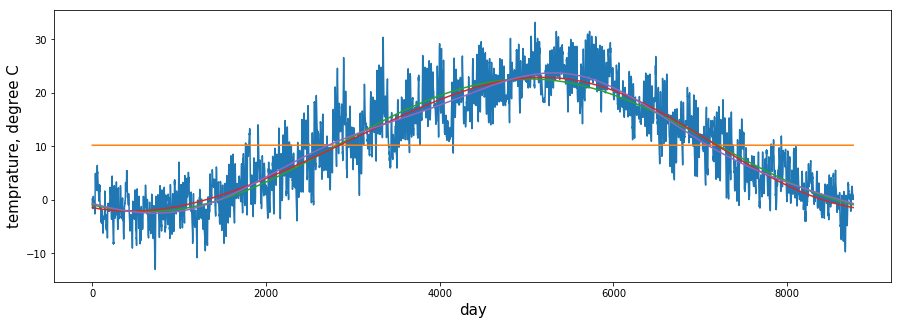

In [13]:
temp = get_outdoor_temperature('region3')
curves = [make_curve(temp,0), make_curve(temp,1), make_curve(temp,2), make_curve(temp,3)]
draw_figure(temp, curves)

### Region 4

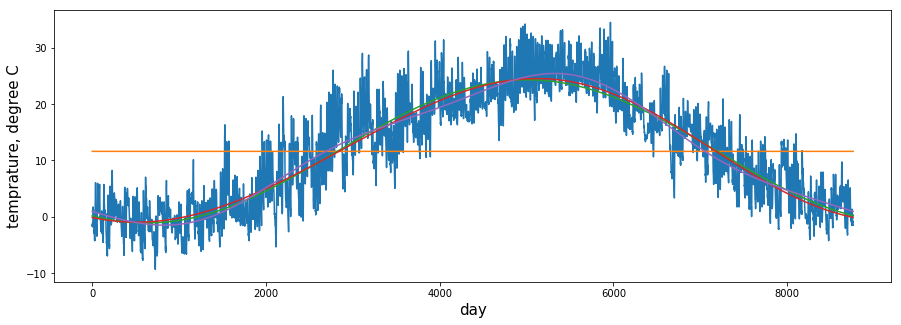

In [14]:
temp = get_outdoor_temperature('region4')
curves = [make_curve(temp,0), make_curve(temp,1), make_curve(temp,2), make_curve(temp,3)]
draw_figure(temp, curves)

### Region 5

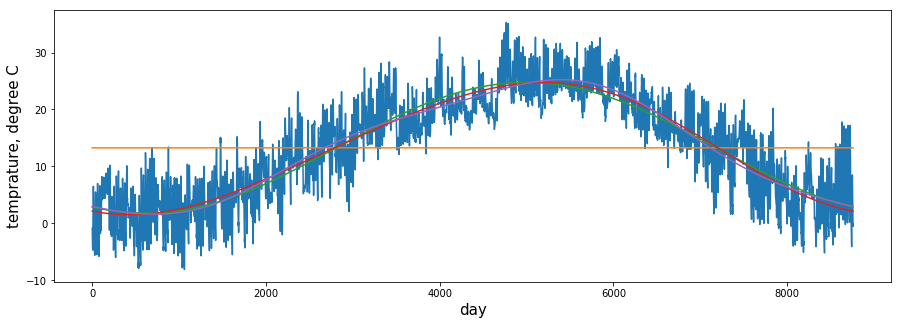

In [15]:
temp = get_outdoor_temperature('region5')
curves = [make_curve(temp,0), make_curve(temp,1), make_curve(temp,2), make_curve(temp,3)]
draw_figure(temp, curves)

### Region 6

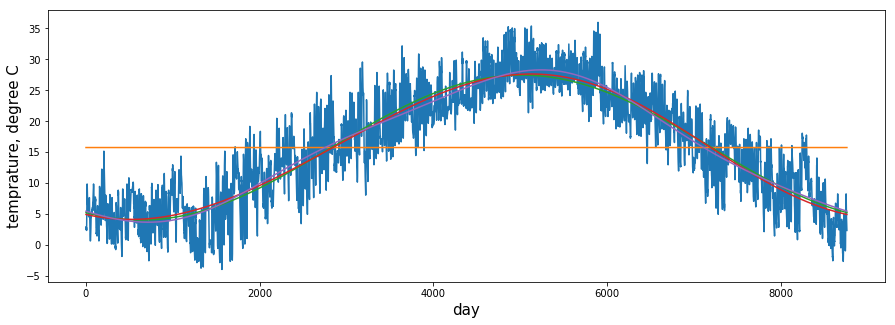

In [16]:
temp = get_outdoor_temperature('region6')
curves = [make_curve(temp,0), make_curve(temp,1), make_curve(temp,2), make_curve(temp,3)]
draw_figure(temp, curves)

### Region 7

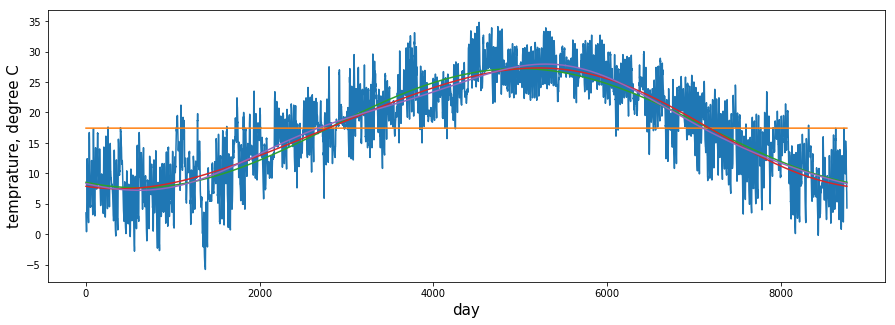

In [17]:
temp = get_outdoor_temperature('region7')
curves = [make_curve(temp,0), make_curve(temp,1), make_curve(temp,2), make_curve(temp,3)]
draw_figure(temp, curves)

### Region 8

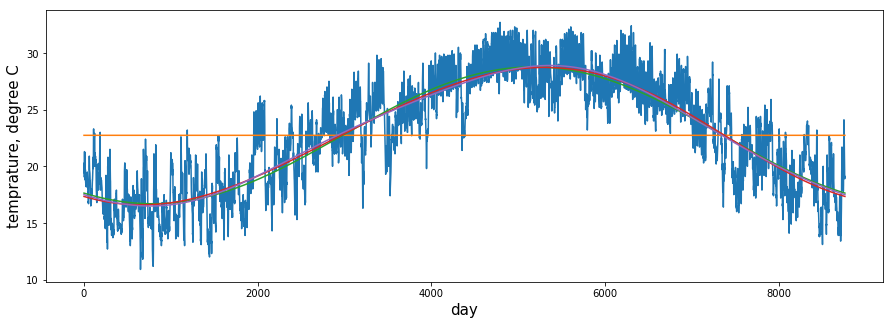

In [18]:
temp = get_outdoor_temperature('region8')
curves = [make_curve(temp,0), make_curve(temp,1), make_curve(temp,2), make_curve(temp,3)]
draw_figure(temp, curves)